In [1]:
import pandas as pd
import FinanceDataReader as fdr

In [2]:
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
get_font_family()

'AppleGothic'

In [4]:
import matplotlib.pyplot as plt

font_family = get_font_family()

plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus = False)
plt.style.use("ggplot")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
def portfolio(Ticker, stock_ratio, start, finish): ## 주식비중(현금비중), 시점 start와 시점 finish가 정해진 portfolio 수익률
    
    df = fdr.DataReader(Ticker, start, finish)
    df["growth"] = df["Close"]/df["Close"].iloc[0] ## 수익률 = finish 시점 주가 / start 시점 주가
    
    
    df["stock"] = stock_ratio    ## 초기 주식 비중 설정
    df["cash"] = 1-stock_ratio   ## 초기 현금 비중 설정 : 현금비중 = 1 - 주식비중
   
    
    length=len(df)
    
    for n in range(length-1):
        A=(df["Close"].iloc[n+1]/df["Close"].iloc[n])*df["stock"].iloc[n]+df["cash"].iloc[n]
        df["stock"].iloc[n+1] = A*stock_ratio
        df["cash"].iloc[n+1] = A*(1-stock_ratio)
    
    df["stock_"+str(int(stock_ratio*100))+"%"] = df["stock"]+df["cash"]  ## 전채 자산 = stock + cash
    
    print("Portfolio return : ",df["stock_"+str(int(stock_ratio*100))+"%"].iloc[length-1])
    
    ## df["growth"].plot(legend=True)
    df["stock_"+str(int(stock_ratio*100))+"%"].plot(legend=True)
    ## 주식비중 포트폴리오별 그래프
    

Portfolio return :  1.2698707370737137
Portfolio return :  1.2719479711224961
Portfolio return :  1.2173377010327147


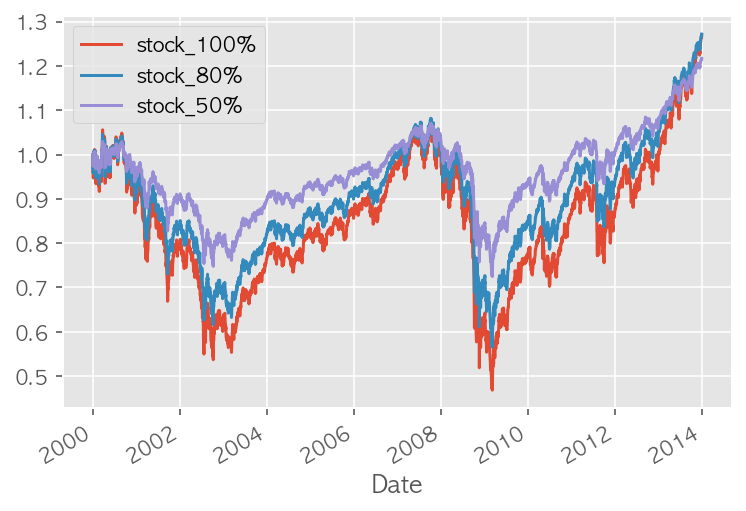

In [6]:
portfolio("SPY", 1.0, "2000","2014")
portfolio("SPY", 0.8, "2000","2014")
portfolio("SPY", 0.5, "2000","2014")

Portfolio return :  4.091652323580062
Portfolio return :  3.188944874397121
Portfolio return :  2.1281119333803726


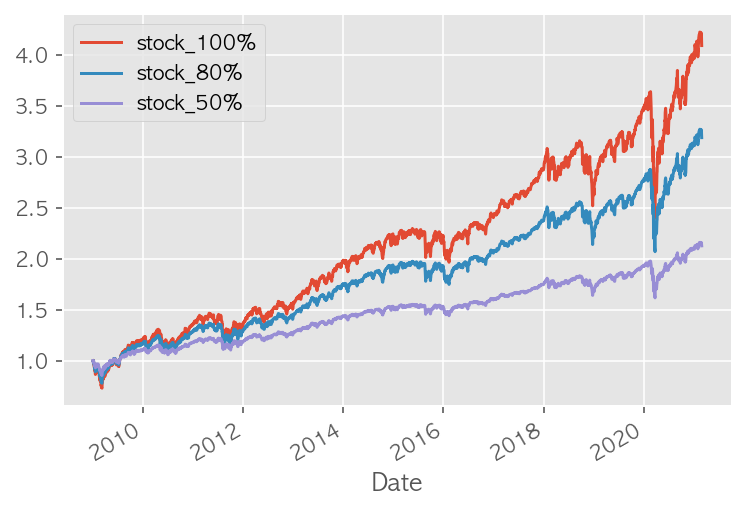

In [7]:
portfolio("SPY", 1.0, "2009","2022")
portfolio("SPY", 0.8, "2009","2022")
portfolio("SPY", 0.5, "2009","2022")

Portfolio return :  1.6148621654015132
Portfolio return :  1.4949163151225446
Portfolio return :  1.3083636392100106


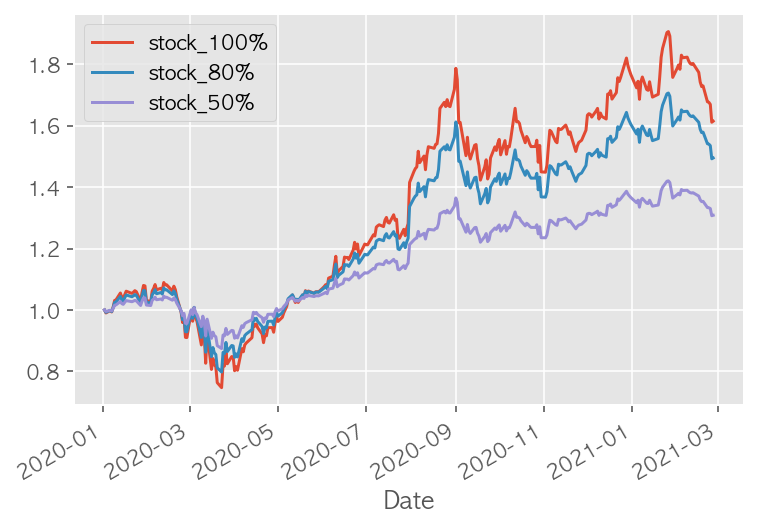

In [8]:
portfolio("AAPL", 1.0, "2020","2022")
portfolio("AAPL", 0.8, "2020","2022")
portfolio("AAPL", 0.5, "2020","2022")